# Quran Dataset - NLP
Quran word frequency analysis and word cloud generation.

## Importing Libraries

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('en.yusufali.csv', dtype='object')
df.head()

,Surah,Ayah,Text
0,1,1,"In the name of Allah, Most Gracious, Most Merc..."
1,1,2,"Praise be to Allah, the Cherisher and Sustaine..."
2,1,3,"Most Gracious, Most Merciful;"
3,1,4,Master of the Day of Judgment.
4,1,5,"Thee do we worship, and Thine aid we seek."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Surah   6236 non-null   object
 1   Ayah    6236 non-null   object
 2   Text    6236 non-null   object
dtypes: object(3)
memory usage: 146.3+ KB


In [11]:
df.shape

(6236, 3)

In [13]:
##
import re

surah_verse_dict = {}
surah_text = {}
for i in range(1, 115):
    surah_verse_dict[str(i)] = {}
    surah_text[str(i)] = ''

for i, row in df.iterrows():
    try:
        surah_verse_dict[row['Surah']][row['Ayah']] = row['Text']
        surah_text[row['Surah']] += ' ' + row['Text'] + ' '
    except:
        print(i)
        pass




Surah # 1


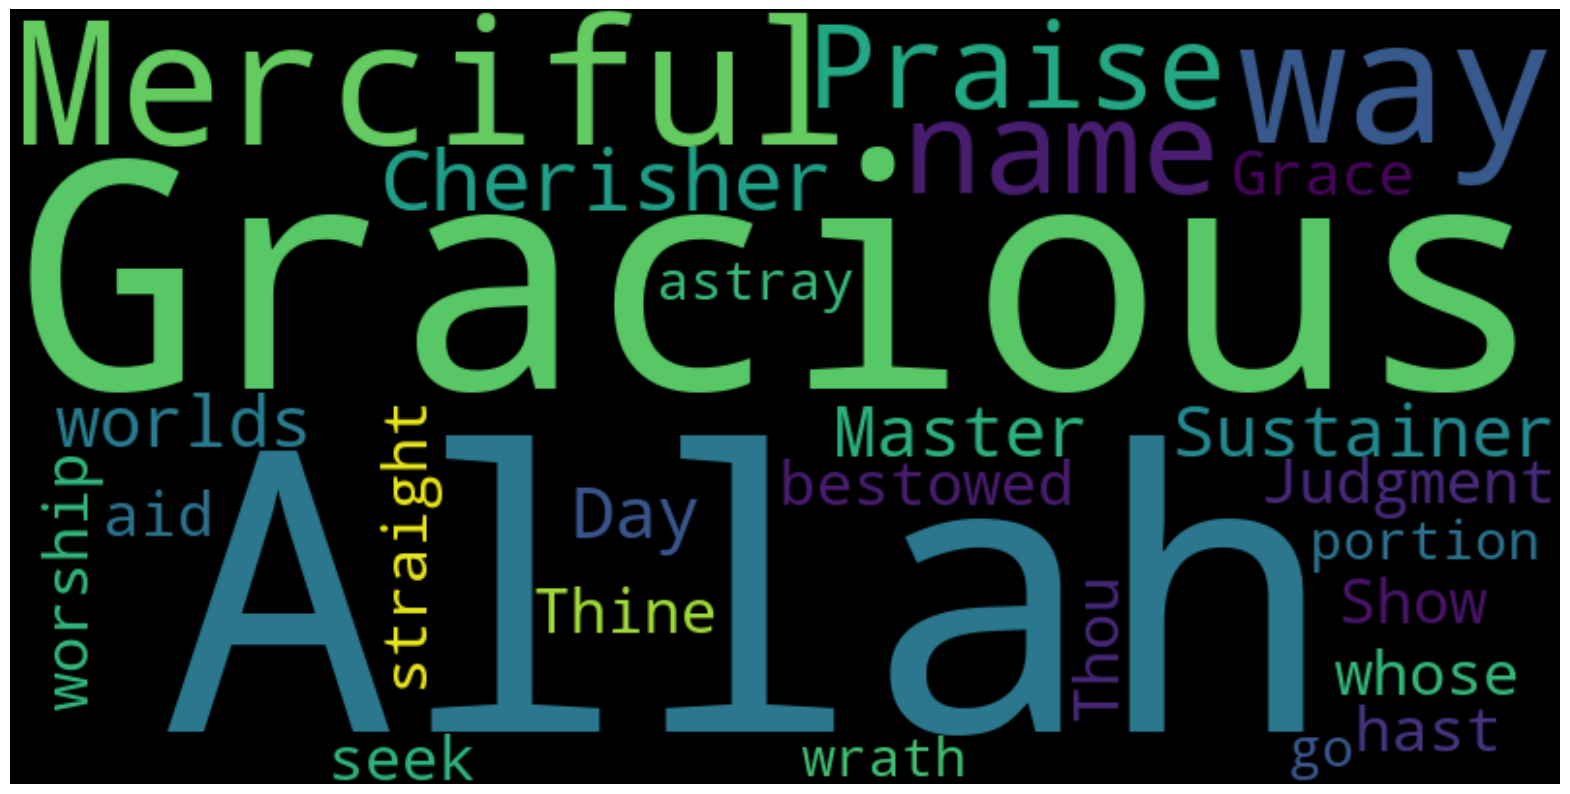

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

custom_stopwords = ['ye', 'verily', 'will', 'said', 'say', 'us', 'thy', 'thee']

for sw in custom_stopwords:
    STOPWORDS.add(sw)

for key in surah_text.keys():
    print('Surah #', key)
    worldcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=800, height=400).generate(surah_text[key])
    plt.figure(figsize=(20, 20))
    plt.imshow(worldcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    break


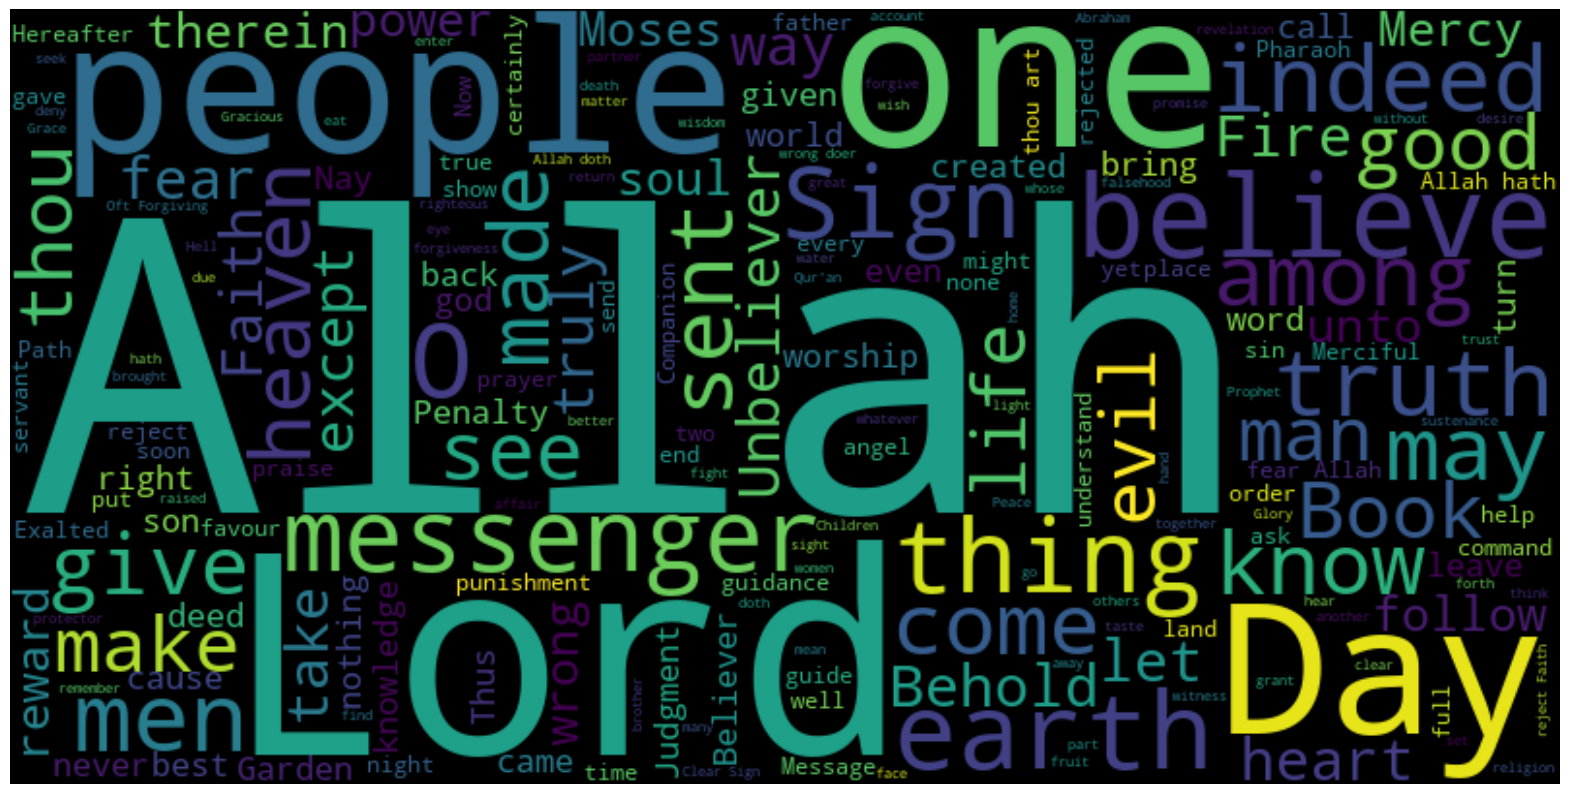

In [17]:
wc = WordCloud(stopwords=STOPWORDS, background_color='black', width=800, height=400).generate(' '.join(df['Text']))
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [18]:
## most common 2 words
n = 2
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.update(custom_stopwords)
words = [word for word in re.findall(r'\w+', ' '.join(df['Text']).lower()) if word not in stop_words]
Counter(zip(words, words[1:])).most_common(n)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cevheri/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[(('heavens', 'earth'), 174), (('allah', 'hath'), 126)]

In [19]:
## most common 2 words
def show_wordcloud(data, title = None, background_color = 'white'):
    wordcloud = WordCloud(
        background_color = background_color,
        # max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42,
        stopwords = STOPWORDS,
    ).generate(' '.join(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
